# Load Data

In [23]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5


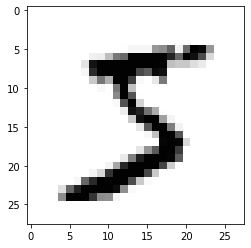

9


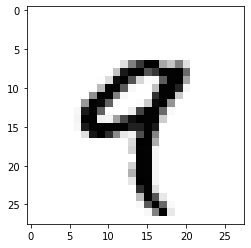

In [ ]:
# Display data as an image
for i in [0,4]:
  print(y_train[i])
  plt.imshow(X_train[i,:,:], cmap = "Greys")
  plt.show()


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
from keras import callbacks
# define the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(X_train, y_train, epochs = 3, batch_size = 128, validation_data=(X_test, y_test),
          callbacks = [EarlyStopping(patience=2), ModelCheckpoint('our_best_model.hdf5', save_best_only=True)])

Epoch 1/3
469/469 [==============================] - 32s 68ms/step - loss: 1.6601 - accuracy: 0.9119 - val_loss: 0.5716 - val_accuracy: 0.9380
Epoch 2/3
469/469 [==============================] - 32s 67ms/step - loss: 0.3645 - accuracy: 0.9559 - val_loss: 0.3647 - val_accuracy: 0.9532
Epoch 3/3
469/469 [==============================] - 31s 67ms/step - loss: 0.2545 - accuracy: 0.9631 - val_loss: 0.3580 - val_accuracy: 0.9587


In [66]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 10816)             0         
                                                                 
 dense_22 (Dense)            (None, 10)                108170    
                                                                 
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.history.history

{'accuracy': [0.9119333624839783, 0.9559000134468079, 0.9630833268165588],
 'loss': [1.6600978374481201, 0.36445048451423645, 0.25452256202697754],
 'val_accuracy': [0.9380000233650208, 0.9531999826431274, 0.9587000012397766],
 'val_loss': [0.5715726017951965, 0.36466965079307556, 0.35796618461608887]}

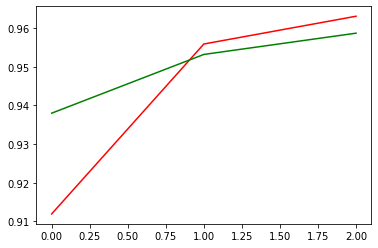

In [76]:
import seaborn as sns
plt.plot(model.history.history['accuracy'], color = 'r')
plt.plot(model.history.history['val_accuracy'], color = 'g')

In [81]:
# returns val_loss and val_accuracy
# we got this before in the process of fitting
# useful when we validated the training model with the validated data; and using test data once at the end for final test!
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3580 - accuracy: 0.9587


[0.35796627402305603, 0.9587000012397766]

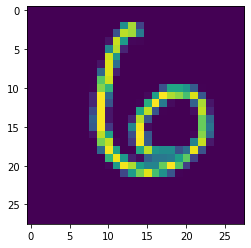

6


6

In [83]:
plt.imshow(X_test[100,:,:])
plt.show()
print(y_test[100])
model.predict(X_test[100,:,:].reshape(1,28,28,1)).argmax()